In [ ]:
#Uploading Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import matplotlib.image as image
from matplotlib import pyplot
from random import randint
from PIL import Image

In [ ]:
BASE_DIR='/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset'
B_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
M_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
N_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Normal cases'

In [ ]:
datagen = ImageDataGenerator(shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             rotation_range = 90)

In [ ]:
#Augmenting the class with low data
image_directory = B_PATH
SIZE = 224
dataset = []
cnt = 0
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(os.path.join(image_directory,image_name))
        image = cv2.resize(image,(SIZE, SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/content/drive/MyDrive/In-Med/Augmented',
                          save_prefix='dr',
                          save_format='jpg'):
    i += 1
    if i > 35:
        break

In [ ]:
AB_PATH = '/content/drive/MyDrive/In-Med/Augmented'

In [ ]:
aug_class = {'b_1': len(os.listdir(B_PATH)),
             'a_1': len(os.listdir(AB_PATH))
             }
#len(os.listdir(AB_PATH))=544

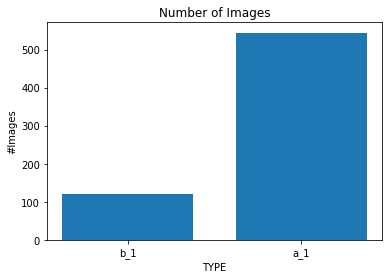

In [ ]:
#Number of images before and after augmentation in Bengin class
plt.bar(aug_class.keys(), aug_class.values(), width = 0.75);
plt.title("Number of Images");
plt.xlabel('TYPE');
plt.ylabel('#Images');

In [ ]:
num_class1 = {'b_1': len(os.listdir(AB_PATH)),
             'm_2': len(os.listdir(M_PATH)),
             'n_3': len(os.listdir(N_PATH))}

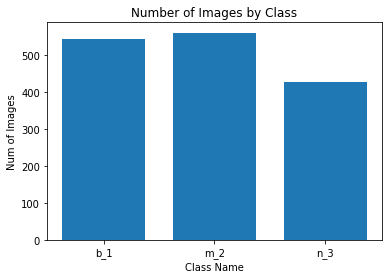

In [ ]:
#Number of images in each class after augmentation
plt.bar(num_class1.keys(), num_class1.values(), width = 0.75);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('Num of Images');